In [1]:
from json import loads
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
POST_PATH = "Post_Analysis.json"

In [3]:
polarity = []
lang = []
with open(POST_PATH, 'r') as post_file:
    for line in post_file:
        post = loads(line)
        if post["sentiment"] == {}:
            polarity.append('NA')
        elif post["sentiment"] == 'ERR':
            polarity.append('NA')
        else:
            polarity.append(post["sentiment"])
        lang.append(post["lang"])

# Nº de P, N, NEU


In [4]:
for i in polarity:
    if type(i) is not str:
        print(i)
        print(type(i))

In [5]:
PolCounter = Counter(polarity)
for pol, count in PolCounter.items():
    print(f"{pol}: {count}")

Negative: 2052
Neutral: 2559
Positive: 1164
NA: 90


# PIECHART con %

dict_keys(['Negative', 'Neutral', 'Positive', 'NA'])


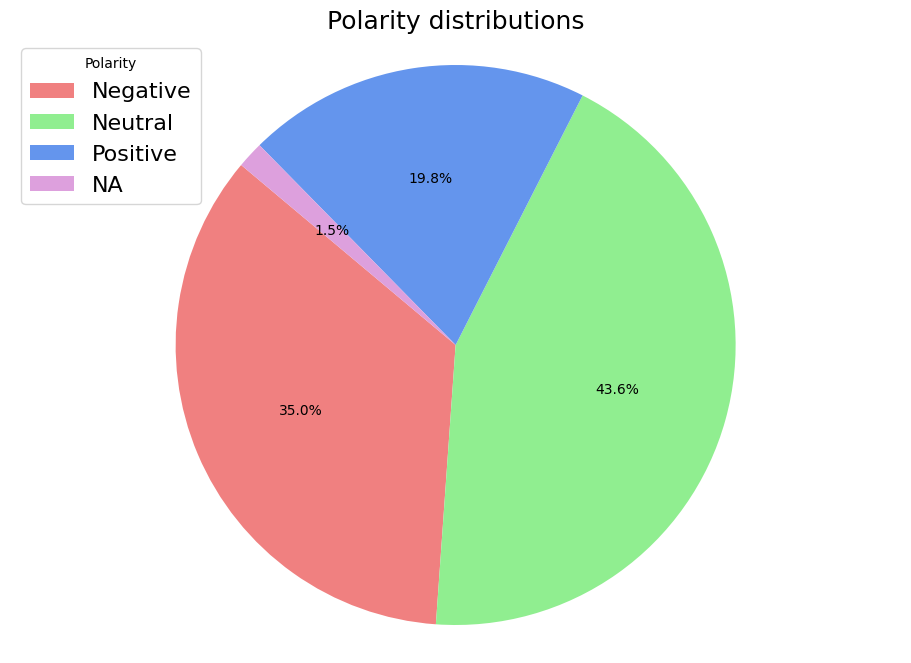

In [6]:
labels = PolCounter.keys()
print(labels)
counts = PolCounter.values()
labels = ["Negative", "Neutral", "Positive", "NA"]

colors = ['lightcoral', 'lightgreen', 'cornflowerblue', 'plum'] 
# Create the pie chart
plt.figure(figsize=(11.5, 8))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Polarity distributions",fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(labels, title="Polarity", loc="upper left",fontsize=16)# bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.show()

# Lang stats

In [7]:
lang = list(map(lambda x: x.replace('sl', 'es'), lang))
lang = list(map(lambda x: x.replace('tl', 'es'), lang))
lang = list(map(lambda x: x.replace('lv', 'es'), lang))
lang = list(map(lambda x: x.replace('', 'none'), lang))


In [8]:
print(f"Languages: {set(lang)}")
langCounter = Counter(lang)
for idiom, count in langCounter.items():
    print(f"{idiom}: {count}")

Languages: {'nonepnonetnone', 'noneenonennone', 'none', 'noneinonetnone', 'noneenonesnone'}
noneenonesnone: 5427
noneinonetnone: 90
nonepnonetnone: 239
noneenonennone: 81
none: 28


In [9]:
labels = ['Spanish', 'Italian', 'Portuguese', 'English', 'None']

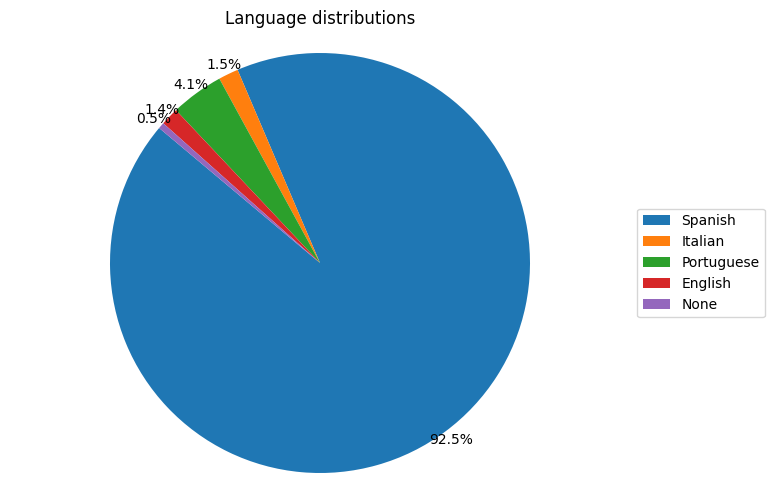

In [10]:
#labels = langCounter.keys()
counts = langCounter.values()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, autopct='%1.1f%%', startangle=140, pctdistance=1.05)
plt.title("Language distributions")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.show()